Nama  : Faqih Rizky Al Faiz<br>
Nim   : 22.11.4774<br>
Kelas : 22IF04

Kaggle :https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data <br>




| Kolom                  | Deskripsi                                                                                     |
|------------------------|-----------------------------------------------------------------------------------------------|
| `id`                   | Identifikasi unik untuk setiap pasien.                                                       |
| `gender`               | Jenis kelamin pasien, dikategorikan sebagai "Male" (Laki-laki), "Female" (Perempuan), atau "Other" (Lainnya). |
| `age`                  | Usia pasien dalam tahun.                                                                     |
| `hypertension`         | Status hipertensi: 0 jika pasien tidak memiliki hipertensi, 1 jika pasien memiliki hipertensi. |
| `heart_disease`        | Status penyakit jantung: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung. |
| `ever_married`         | Status pernikahan: "No" jika pasien belum pernah menikah, "Yes" jika pasien pernah menikah.   |
| `work_type`            | Status pekerjaan, dikategorikan sebagai "children" (anak-anak), "Govt_job" (pegawai pemerintah), "Never_worked" (tidak pernah bekerja), "Private" (swasta), atau "Self-employed" (wirausaha). |
| `Residence_type`       | Jenis tempat tinggal: "Rural" (pedesaan) atau "Urban" (perkotaan).                            |
| `avg_glucose_level`    | Rata-rata kadar glukosa dalam darah pasien, diukur dalam mg/dL.                               |
| `bmi`                  | Indeks Massa Tubuh (Body Mass Index/BMI) pasien.                                              |
| `smoking_status`       | Riwayat merokok, dikategorikan sebagai "formerly smoked" (pernah merokok), "never smoked" (tidak pernah merokok), "smokes" (merokok), atau "Unknown" (tidak diketahui). |
| `stroke`               | Variabel target: 1 jika pasien pernah mengalami stroke, 0 jika tidak.                         |




# Import libraries

In [88]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample


In [6]:
!pip install pandas
!pip install missingno
!pip install seaborn
!pip install matplotlib
!pip install numpy;

# Pengumpulan Data

In [7]:
# Load training data
data = pd.read_csv('/content/drive/MyDrive/BDDM/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Ukuran data
print("\nUkuran Dataset:", data.shape)


Ukuran Dataset: (5110, 12)


In [9]:
# Explore columns
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
# Description
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Check Datatypes
data.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


# Data Preprocessing

In [12]:
# Check for any null or missing values
data.isnull().values.any()

True

In [13]:
# Check missing values in each column of training data
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [14]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [15]:
data['smoking_status'].unique().tolist()

['formerly smoked', 'never smoked', 'smokes', 'Unknown']

In [16]:
# Make a copy of data
train_data = data.copy()

In [17]:
# Change data types of columns
for c in col_list:
    if c != 'smoking_status':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [18]:
# Compare Actual and Encoded labels
for c in col_list:
    if c != 'smoking_status':
        print('column:', c)
        print(data[c].unique().tolist())
        print(train_data[c].unique().tolist(), '\n')

column: gender
['Male', 'Female', 'Other']
[1, 0, 2] 

column: ever_married
['Yes', 'No']
[1, 0] 

column: work_type
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
[2, 3, 0, 4, 1] 

column: Residence_type
['Urban', 'Rural']
[1, 0] 



In [19]:
train_data['smoking_status'].head()

,smoking_status
0,formerly smoked
1,never smoked
2,never smoked
3,smokes
4,never smoked


In [20]:
# Convert unknown in smoking_status to -1
train_data.loc[train_data['smoking_status'] == 'Unknown', 'smoking_status'] = -1

In [21]:
(train_data['smoking_status'] == -1).sum()

1544

In [22]:
count_replaced = (train_data['smoking_status'] == -1).sum()
print(f"Count of replaced 'unknown' values: {count_replaced}")

Count of replaced 'unknown' values: 1544


In [23]:
train_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [24]:
# Deal with Missing Values

missing_vals = train_data['bmi'].isnull().sum()
observed_vals = train_data.loc[train_data['bmi'].notnull(), 'bmi']
train_data.loc[train_data['bmi'].isnull(), 'bmi'] = observed_vals.mean()

In [25]:
train_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [26]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,never smoked,1


One Hot Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
smoking_mapping = {
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': None,
}
train_data['smoking_status'] = train_data['smoking_status'].map(smoking_mapping)

In [29]:
train_data['smoking_status'].isnull().sum()

1544

In [30]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1.0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,0.0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,0.0,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,2.0,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,0.0,1


In [31]:
print(data['smoking_status'].unique().tolist())
print(train_data['smoking_status'].unique().tolist(), '\n')

['formerly smoked', 'never smoked', 'smokes', 'Unknown']
[1.0, 0.0, 2.0, nan] 



In [32]:
features = train_data.drop(columns=['id', 'smoking_status'])
target = train_data['smoking_status']

In [33]:
X_train = features[target.notna()]
y_train = target[target.notna()]

In [34]:
y_train

,smoking_status
0,1.0
1,0.0
2,0.0
3,2.0
4,0.0
...,...
5102,0.0
5105,0.0
5106,0.0
5107,0.0


In [35]:
from sklearn import linear_model

# model = linear_model.LinearRegression()
# model.fit(X, y_encoded)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
missing_mask = train_data['smoking_status'].isna()
X_missing = features[missing_mask]
predicted_values = model.predict(X_missing)

In [38]:
train_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [39]:
train_data.loc[train_data['smoking_status'].isna(), 'smoking_status'] = predicted_values

In [40]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1.0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,0.0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,0.0,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,2.0,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,0.0,1


# Exploratory Data Analysis

In [41]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   float64
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(4), int8(4)
memory usage: 339.5 KB
None


Box Plot

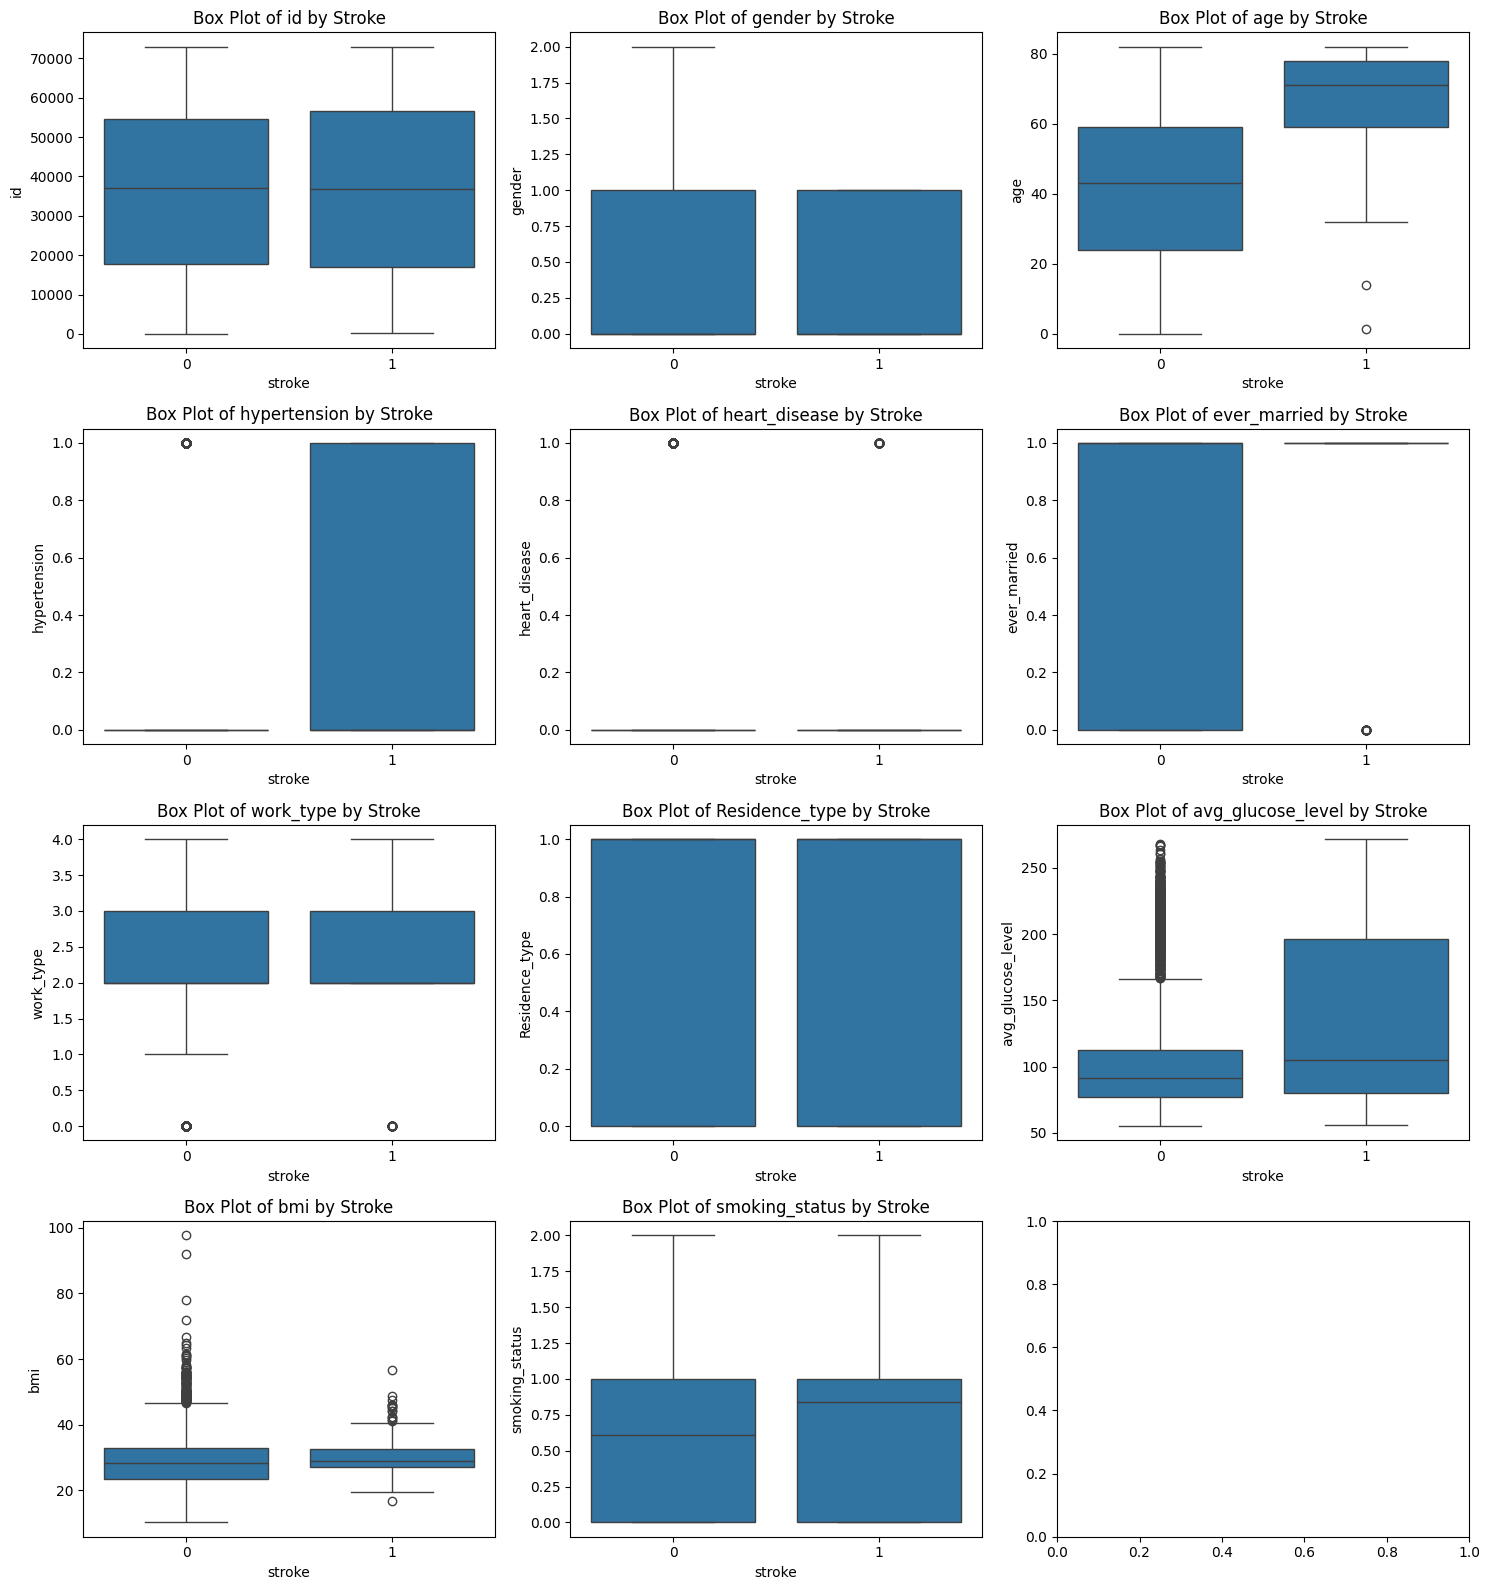

In [43]:
num_cols = 3
num_rows = (len(train_data.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, c in enumerate(train_data.columns):
    if c != "stroke":
        sns.boxplot(x='stroke', y=c, data=train_data, ax=axes[i])
        axes[i].set_title(f'Box Plot of {c} by Stroke')

plt.tight_layout()
plt.show()

Correlation heatmap

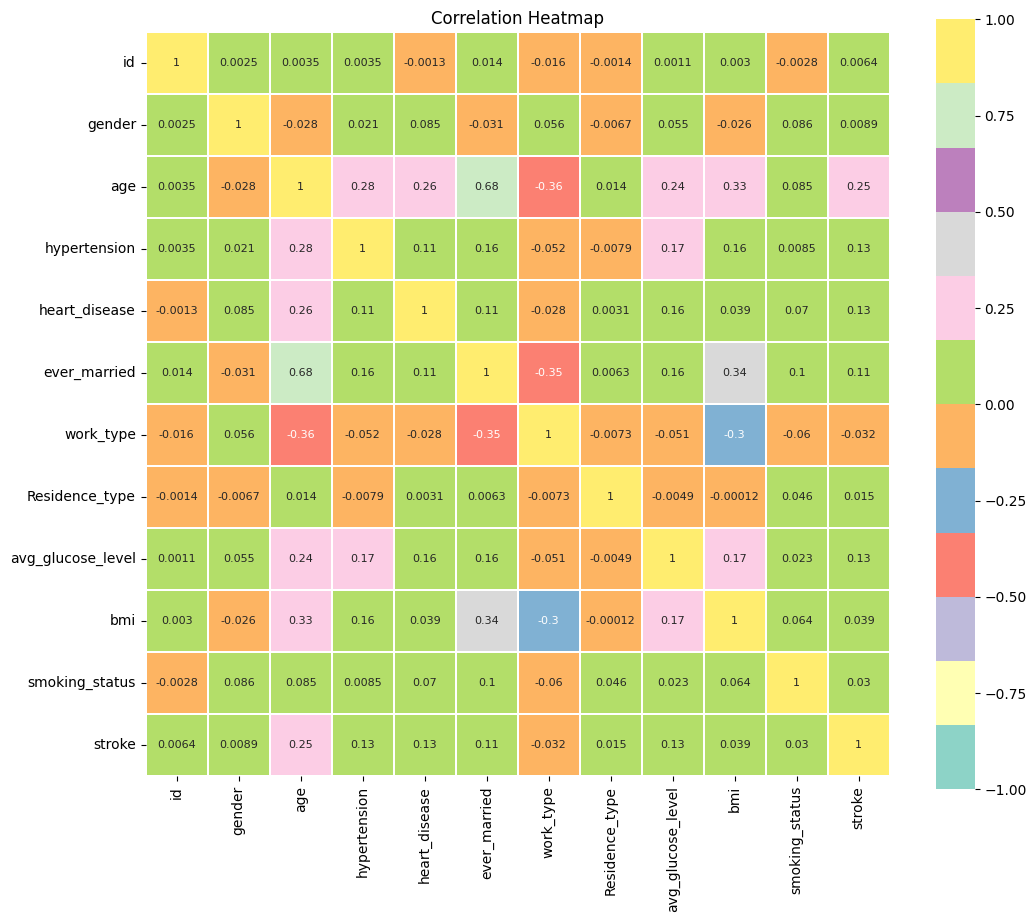

In [44]:
corr = train_data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr,
            cmap='Set3', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.title('Correlation Heatmap')
plt.show()

In [45]:
data['stroke'].value_counts().get(0)

4861

<ipython-input-46-56c4cb88c06f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['stroke'])


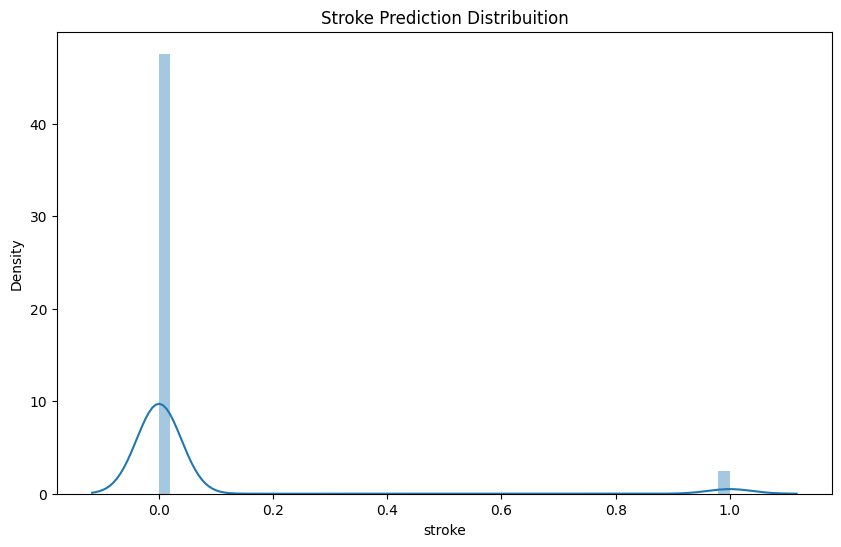

In [46]:
# distribution plot of target variable (stroke)
plt.figure(figsize = (10, 6))
plt.title('Stroke Prediction Distribuition')
sns.distplot(train_data['stroke'])
plt.show()

Count Plot

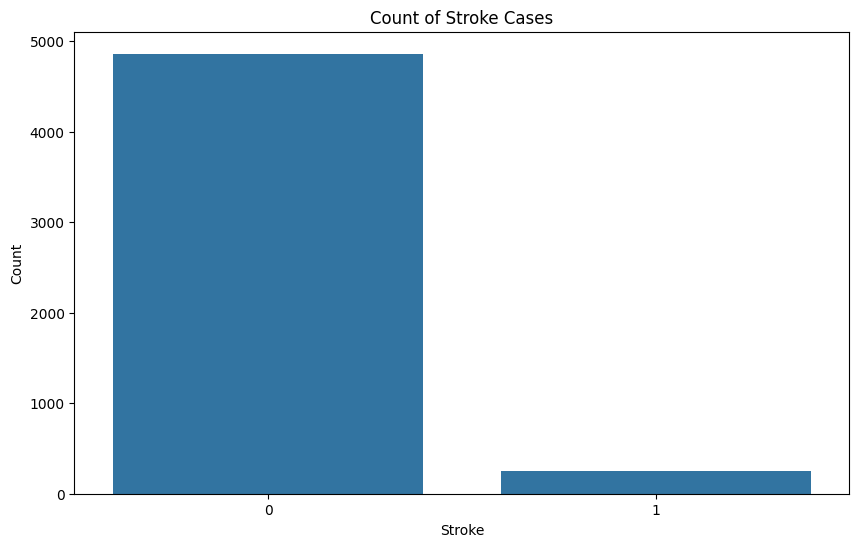

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=train_data)
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

## Feature Selection

In [48]:
# Fitur age dan ever_married sangat berkorelasi.

# Hapus ever_married dan pertahankan age saja

train_data = train_data.drop(columns=['id', 'ever_married'])
train_data.shape

(5110, 10)

## Model Training

In [49]:
# Standarisasi data
from sklearn.preprocessing import StandardScaler


cols = ['smoking_status']

# Pilih kolom yang tersisa dan standarisasikan
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

In [64]:
# Train Test Split

from sklearn.model_selection import train_test_split
y = train_data['stroke']
X = train_data.drop(columns=['stroke'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (4088, 9)
Validation Set Dimensions: (1022, 9)


In [68]:
train_data['smoking_status'].isnull().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: smoking_status, Length: 5110, dtype: bool>

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 913 to 281
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   float64
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   float64
 3   heart_disease      4088 non-null   float64
 4   work_type          4088 non-null   float64
 5   Residence_type     4088 non-null   float64
 6   avg_glucose_level  4088 non-null   float64
 7   bmi                4088 non-null   float64
 8   smoking_status     4088 non-null   float64
dtypes: float64(9)
memory usage: 319.4 KB


In [53]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

Mean Absolute Error (MAE): 0.20380815082656992
Mean Squared Error (MSE): 0.3094741267063721
Root Mean Squared Error (RMSE): 0.556303987677935
R² Score: 0.6795139641084881

Feature Importance:
Feature: gender = 0.025861276582588126
Feature: age = 0.21258374664039875
Feature: hypertension = 0.02563876412244244
Feature: heart_disease = 0.018711886391140735
Feature: work_type = 0.0443368181619057
Feature: Residence_type = 0.028738903885548926
Feature: avg_glucose_level = 0.31543892388180944
Feature: bmi = 0.23228182734498098
Feature: smoking_status = 0.096407852989185


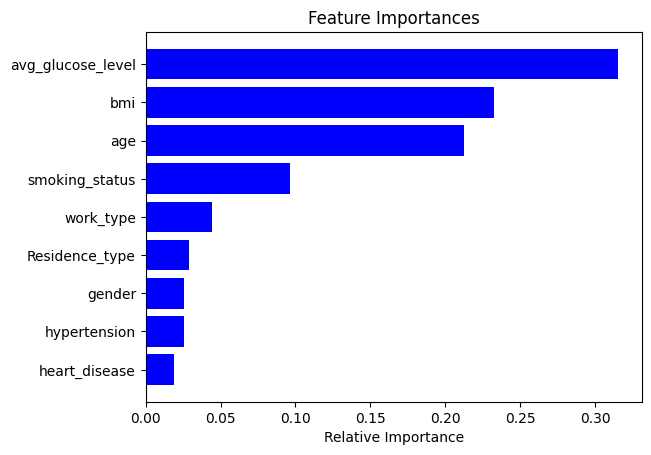

In [87]:
# Prediksi pada data uji
y_pred = randomf.predict(X_test)

# Evaluasi model dengan metrik regresi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi metrik regresi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Evaluasi feature importance
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns

print("\nFeature Importance:")
for name, importance in zip(features, importances):
    print('Feature:', name, "=", importance)

# Plotting Feature Importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [90]:
import joblib

# Simpan model ke file
joblib.dump(randomf, 'randomforest_regressor_model.pkl')

print("Model berhasil disimpan sebagai 'randomforest_regressor_model.pkl'")


Model berhasil disimpan sebagai 'randomforest_regressor_model.pkl'


## Pengujian dan Optimasi

In [75]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12],
          'max_features': [2, 4, 6],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12],
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [76]:
import sklearn.metrics as metrics

In [82]:
# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_

# get best model predictions for training and validation sets
predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)

# print mean absolute error for predictions taken from the best model
print('Mean Absolute Error for Training Set:', metrics.mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', metrics.mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 0.36703396642563063
Mean Absolute Error for Validation Set: 0.38000961079809426


h

h

h